In [23]:
lst=open("/home/limu/Space/logs/all_nogs.lst").readlines()

In [26]:
mst=[[int(l.split()[4])]+l.strip()[l.rfind('/')+1:-4].split('_') for l in lst]

In [27]:
from collections import Counter
coo=Counter([m[2] for m in mst if m[2][:4]=='2022'])
#coo
coo2=Counter([m[2] for m in mst if m[2][:4]=='2022' and m[0]>0])

In [32]:
#[(a,coo[a],b) for a,b in coo2.items() if b>1]
#sum(coo2.values())
obid=[m[-1] for m in mst if m[2][:4]=='2022' and m[0]>0]
len(obid)

801

### GRBAlpha

API Key 6ff2ac453cd6ead9107ee4e3d33164d272241aaf

https://db.satnogs.org/satellite/HFFD-8697-8440-3101-3937

probably https://db.satnogs.org/api/satellites/HFFD-8697-8440-3101-3937 returns REST XML (according to [docs](https://db.satnogs.org/api/schema/docs/#/satellites/satellites_retrieve))

In [1]:
from glouton.domain.parameters.programCmd import ProgramCmd
from glouton.services.observation.observationsService import ObservationsService

In [5]:
from datetime import datetime,timedelta
start_date=datetime.now()
end_date=start_date+timedelta(0,600)
glouton_conf = ProgramCmd(norad_id=47959,
                              ground_station_id=None,
                              start_date=start_date,
                              end_date=end_date,
                              observation_status=None,
                              working_dir="/tmp",
                              #payloads=False,
                              waterfalls=False,
                              demoddata=True,
                              #payload_modules=None,
                              demoddata_modules=["CSV"],
                              waterfall_modules=None,
                              archives=None,
                              archive_modules=None, 
                              archive_end_modules=None, 
                              demoddata_end_modules=None,
                              waterfall_end_modules=None,
                              frame_end_modules = None,
                              user=None,
                              transmitter_uuid=None,
                              transmitter_mode=None,
                              transmitter_type=None,
                              frame_modules=None,
                              observer=None,
                              app_source=None,
                              transmitter=None)

In [6]:
obs = ObservationsService(glouton_conf)
obs.extract()

(FOR_EACH) Demoddata module(s) loading :
module : CSV loaded
(END) Demoddata module(s) loading :
No module list found
job 1 scanning page...1
job 1 terminated

downloading started (Ctrl + C to stop)...	~(  ^o^)~


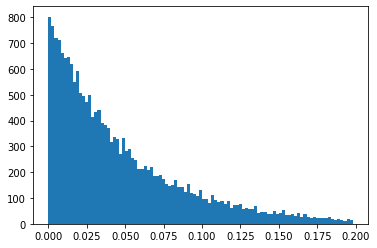

In [29]:
#pileup simulation
from scipy import stats as st
set1=st.uniform.rvs(size=20000)
set1=np.sort(set1)
dis1=set1[1:]-set1[:-1]
out=pl.hist(dis1*1000,np.r_[:.2:0.002])[0];

In [31]:
sum(out[:20])

11133.0

### SGR case

In [76]:
from astropy import coordinates as coor
sgr=coor.name_resolve.get_icrs_coordinates("SGR 1935+2154")

ImportError: cannot import name 'Time' from 'astropy' (/usr/local/lib64/python3.10/site-packages/astropy/__init__.py)

In [44]:
from datetime import datetime
import pytz
time=datetime.fromisoformat("2022-10-13T22:41:28").replace(tzinfo=pytz.timezone("UTC"))

In [49]:
integral_ID=27540
fermi_ID=33053
tle_URL="https://celestrak.org/NORAD/elements/gp.php?CATNR=%i&FORMAT=TLE"%integral_ID
import requests
web1=requests.get(tle_URL)
tle_int=web1.text.strip().replace('\r\n','\n')

In [94]:
print(tle_int)

INTEGRAL                
1 27540U 02048A   22290.21659545 -.00000005  00000+0  00000+0 0  9998
2 27540  78.4756  52.1931 8863541 296.6437  67.4206  0.37577721 21603


In [52]:
tle='''VZLUSAT2
1 51085U 22002BF  22150.70473102  .00004963  00000-0  28884-3 0  9994
2 51085  97.4865 217.8168 0015989 133.4617 325.2380 15.12382761 20719'''
import predict
qth=(15,50,200)
glopos=predict.observe(tle, qth, at=time.timestamp())
pos=[glopos[a] for a in ['longitude','latitude','altitude']]
sgr.location=coor.EarthLocation.from_geodetic(pos[0],pos[1],pos[2]*1e3)

In [90]:
dt=40
predict.observe(tle_int, qth, at=(time+timedelta(0,dt)).timestamp())

{'norad_id': 27540,
 'name': 'INTEGRAL                ',
 'epoch': 1665700928.0000002,
 'latitude': 15.84854806363751,
 'longitude': 225.65168091656685,
 'azimuth': 284.0322556156848,
 'elevation': 1.034434996783022,
 'orbital_velocity': 13043.907512693391,
 'footprint': 18189.908484322124,
 'altitude': 37810.50343965367,
 'slant_range': 43612.09040345785,
 'eclipse_depth': -134.12938686452688,
 'orbital_phase': 244.96575573049358,
 'orbital_model': 'SDP4',
 'visibility': b'V',
 'sunlit': 1,
 'orbit': 2158,
 'geostationary': 0,
 'has_aos': 1,
 'decayed': 0,
 'doppler': 873.7458529942779,
 'eci_x': -28080.961367640357,
 'eci_y': -31915.451277050404,
 'eci_z': 12056.488589564868,
 'eci_vx': 1.922899124411742,
 'eci_vy': 1.6005494695564657,
 'eci_vz': -2.6208888996714057,
 'eci_sun_x': -139717012.17497563,
 'eci_sun_y': -48133042.98472636,
 'eci_sun_z': -20867084.16314729,
 'eci_obs_x': 4203.14616657446,
 'eci_obs_y': -4506.497263230539,
 'eci_obs_z': 1640.1519040049125,
 'beta_angle': -3

In [107]:
def passage(dtimes,tle,time):
    alalt=[]
    from datetime import timedelta
    from astropy.time import Time
    t0=time.timestamp()
    for dt in dtimes:
        glopos=predict.observe(tle, qth, at=t0+dt)
        pos2=[glopos[a] for a in ['longitude','latitude','altitude']]
        loc2=coor.EarthLocation.from_geodetic(pos2[0],pos2[1],pos2[2]*1e3)
        altaz2=sgr.transform_to(coor.AltAz(obstime=Time(time+timedelta(0,dt)),location=loc2))
        alalt.append([altaz2.alt.value,altaz2.az.value,pos2[0],pos2[1]])
    return np.array(alalt).T
dtimes=range(-2000,6000,300)
alphapa=passage(dtimes,tle,time)

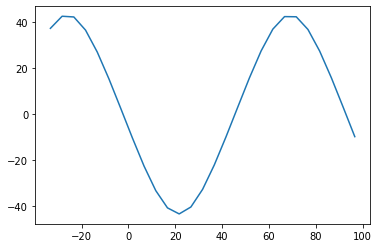

In [109]:
pl.plot(np.array(dtimes)/60,alphapa[0])

In [72]:
from astropy import Time
sgr.time=Time(time)

ImportError: cannot import name 'Time' from 'astropy' (/usr/local/lib64/python3.10/site-packages/astropy/__init__.py)

In [1]:
inp=open("/home/limu/Space/logs/fermi_gcn_2022b.html").read()

In [17]:
import bs4
#bbs=bs4.BeautifulSoup(inp,from_encoding='utf8')

In [5]:
inp.find('<td>')

3357

In [11]:
lines=inp.split('<tr align=left>')

In [15]:
print(lines[3])


<td><a href=other/687936237.fermi>687936237</a></td>
<td align=left>22/10/20</td>
<td align=left>05:23:52.83</td>
<td align=left>GBM Final Position</td>
<td align=left>172.900</td>
<td align=left>+16.050</td>
<td align=left>2.97</td>
<td align=left>   Fermi-GBM Final Position.      This Notice was ground-generated -- not flight-generated.      The LC_URL file should be available by the time this FINAL notice is produced.      This notice was generated completely by automated pipeline processing.      In the LAT Field-of-view.      This is likely a Long GRB.    </td>
</tr>




In [19]:
sp1=bs4.BeautifulSoup(lines[3])

In [31]:
alltext=[[a.text for a in bs4.BeautifulSoup(l).find_all('td')] for l in lines[:203]]

In [27]:
[i for i in range(200,600) if lines[i].find('684716840')>0]

[204, 205, 206]

In [53]:
hids={}
for i in range(len(alltext[3:])):
    l=alltext[3+i]
    if len(l)<5: continue
    if len(l[0])>4:
        if l[0] in hids and l[3].find('Flight')>0:
            if len(alltext[hids[l[0]]])>2 and alltext[hids[l[0]]][3].find('Flight')<0:
                print("correcting at ",i)
        else:
            hids[l[0]]=i+3

correcting at  1
correcting at  3
correcting at  4
correcting at  11
correcting at  13
correcting at  16
correcting at  17
correcting at  20
correcting at  22
correcting at  26
correcting at  31
correcting at  34
correcting at  36
correcting at  41
correcting at  44
correcting at  46
correcting at  48
correcting at  50
correcting at  52
correcting at  54
correcting at  61
correcting at  64
correcting at  65
correcting at  67
correcting at  69
correcting at  75
correcting at  77
correcting at  79
correcting at  81
correcting at  86
correcting at  89
correcting at  119
correcting at  124
correcting at  126
correcting at  131
correcting at  132
correcting at  133
correcting at  138
correcting at  140
correcting at  160
correcting at  163
correcting at  164
correcting at  173
correcting at  186


In [55]:
open("reparse.csv","w").writelines(['; '.join(alltext[k])+'\n' for k in hids.values()])

In [60]:
loc_url="http://gcn.gsfc.nasa.gov/notices_f/gbm_gnd_loc_map_686770317.fits"
loc_url="/home/limu/Space/data/spectra/grbalpha_20210415_20210430_FW2_spec_det0.pha"
from astropy.io import fits

In [61]:
dd=fits.open(loc_url)

In [68]:
#fits.table_to_hdu?

Signature: fits.table_to_hdu(table, character_as_bytes=False)
Docstring:
Convert an `~astropy.table.Table` object to a FITS
`~astropy.io.fits.BinTableHDU`.

Parameters
----------
table : astropy.table.Table
    The table to convert.
character_as_bytes : bool
    Whether to return bytes for string columns when accessed from the HDU.
    By default this is `False` and (unicode) strings are returned, but for
    large tables this may use up a lot of memory.

Returns
-------
table_hdu : `~astropy.io.fits.BinTableHDU`
    The FITS binary table HDU.
File:      /usr/local/lib64/python3.10/site-packages/astropy/io/fits/convenience.py
Type:      function


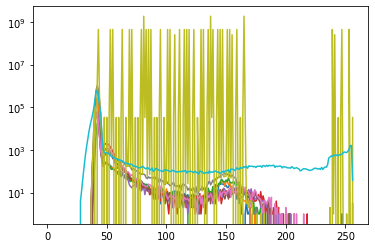

In [78]:
dd[1].data[4]['TSTART']
from matplotlib import pyplot as pl
for i in range(0,40,4):
    pl.semilogy(dd[1].data[i]['CHANNEL'],dd[1].data[i]['COUNTS'])

In [72]:
dd[1].columns

ColDefs(
    name = 'TSTART_UTC'; format = '19A'
    name = 'TSTART'; format = '1D'; unit = 's'
    name = 'TELLAPSE'; format = '1D'; unit = 's'
    name = 'SPEC_NUM'; format = '1I'
    name = 'CHANNEL'; format = '256J'
    name = 'COUNTS'; format = '256J'
    name = 'STAT_ERR'; format = '256D'
    name = 'EXPOSURE'; format = '1D'; unit = 's'
)

In [87]:
import numpy as np
olist=[fits.PrimaryHDU(np.array([]),header=dd[0].header),dd[1]]
fits.writeto("/home/limu/Space/data/spectra/grbalpha_2022_new.pha",np.array([]),header=dd[0].header)

In [83]:
intr=fits.PrimaryHDU()
intr.data

In [88]:
ls1=fits.HDUList()

In [89]:
ls1.append(intr)

In [90]:
ls1.append(dd[1])

In [92]:
ls1.writeto("/home/limu/Space/data/spectra/grbalpha_2022_new.pha",overwrite=True)